<a href="https://colab.research.google.com/github/LazarenkoAB/innopolis/blob/main/AB_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 10 Python A/B

В этом задании вам необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь
классическим подходом) и ответить на вопрос какое из объявлений лучше.


### 1. Контекст задачи 

Ритейл-компания провела редизайн упаковок товара собственного производства в рамках задачи повышения продаж по нему и внедрила на сеть магазинов.
Указанный товар в магазинах был представлен как в новой, так и в старой упаковке.
Конверсия в продажу товара в старом дизайне упаковки в магазинах составляет в среднем в течение года - 30%.
Была поставлена задача оценки успешности нового дизайна по критерию роста его конверсии в продажу на 5%. 

### 2. Формулировка гипотезы

H0: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают соответственно коэффициент конверсии в продажу товара в старом и новом дизайне.
Уровень доверия примем равным 95%, то есть α = 0,05.

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу H0». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

Как итог, нам нужна 95% уверенность в том, что редизайн упаковки позволит увеличить конверсию в продажу до 40%, прежде чем отклонить нулевую гипотезу H0.

### 3. Набор данных

In [ ]:
#Импортируем все библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
#загрузим данный датасет в виде датафрейма
df = pd.read_csv('ad.csv')

In [ ]:
#посмотрим примерные значения и структуру полученного датафрейма
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Описание набора данных:

**A** - контрольная группа, соответствующая товару в старом дизайне упаковки

**B** - тестовая группа, соответствующая товару в новом дизайне упаковки

**action**:

0 - не было покупки

1 - была покупка

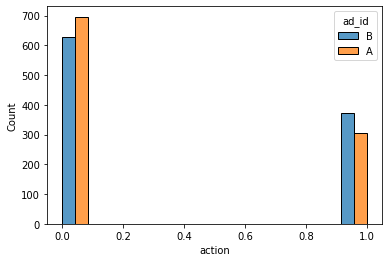

In [ ]:
#построим гистрограмму входных данных - как распределены значения
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

**Промежуточные выводы:**

1. Распределение данных дискретное, которое принимает на вход только два значения: 0 и 1 (биномиальное распределение)

### 4. Статистика набора данных

Рассчитаем для каждой из групп (контрольной и тестовой) - сколько покупок товара с новым и старом дизайном упаковки было сделано, величину консервии в продажу, а также стандартное отклонение и ошибку:


In [ ]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') 
summary_df['std_dev'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)) 
summary_df['std_err'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))


In [ ]:
summary_df

,action,total_count,conversion_rate,std_dev,std_err
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


**Промежуточные выводы:**

Новый дизайн упаковки товара лучше, чем старый (conversion_rate B > conversion_rate A)

### 4. Визуализация промежуточных выводов

Text(0, 0.5, 'Коэф-т конверсии')

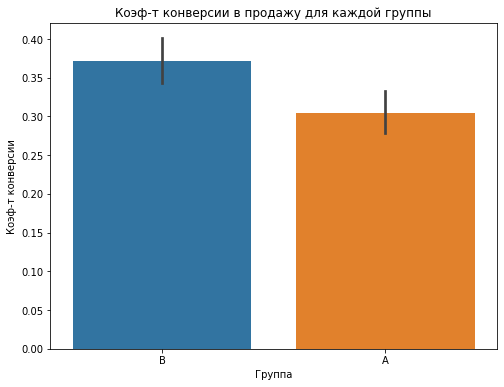

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии в продажу для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

**Промежуточные выводы:**



### 5. Проверка гипотезы

Необходимо определить - статистически ли значима данная разница по конверсии? То есть, можем ли мы быть уверены, что разница, которую мы наблюдаем — неслучайная.

Т.к. разброс значений мал (качественные данные, биномиальное распределение), и набор выборки мал, то для проверки используем Z-статистику (критерий Фишера).

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [ ]:
#Выделяем явно группы: контрольная А, тестовая В
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

Статистический критерий вернет нам значение **p-value**, которое поможет оценить: есть ли статистическая значимость в разнице конверсий, которую показывает наш эксперимент. 

### Посчитаем p-value

In [ ]:
#Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

#Считаем кол-во покупок в каждой группе
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — то есть согласимся, что 5% наших наблюдений будут ошибочными.

In [ ]:
alpha = 0.05

p-value — это фактическая вероятность попасть в ошибку первого рода на наших данных, если мы отклоним нулевую гипотезу. Сравниваем p-value c желаемым уровнем точности нашего эксперимента. 

- Если p-value меньше порога ошибки первого рода — результат эксперимента можно считать статзначимым
- Если p-value больше — мы будем вынуждены признать разницу в значениях тестовой и контрольной группы случайной

In [ ]:
print(pval < alpha)

True


**Промежуточные выводы:**

Т.к. p-value < 0.05, то отклоняем H0. Это означает, что новый дизайн упаковки сработал значительно иначе, чем старый. Результат эксперимента - статистически значимый.

### Доверительные интервалы
Для проверки условий успешности внедрения новой упаковки посмотрим на доверительные интервалы.

In [31]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Диапaзон доверительного интервала для тестовой группы составляет от 34,2% до 40,2%. Этот интервал не включает в себя базовую конверсию 30,4%. Но включает целевое значение к которому мы стремились - 35%.

**Вывод:**
В рамках рассматриваемой задачи признаем редизайн успешным.